<h1>Apartment Statistics</h1>

<p>This notebook will use the csv results from the Apartment finder notebook to analyse the data and allow us to get some answers about which region would be better to rent an apartment taking the conditions shown in the Problem Introduction into considerations.</p>

<h2>First of all, we have to make sure to import all the libraries needed.</h2>

In [17]:

import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files


import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe


# Matplotlib and associated plotting modules
# we are using the inline backend
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import html
from IPython.display import HTML

print('Libraries imported.')

Libraries imported.


In [127]:

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')


In [128]:
apartment_df = pd.read_csv("apartment_dataframe.csv")


In [129]:
#apartment_df.shape

In [21]:
#To add The neighborhoods for each address on the dataframe:

address_list = apartment_df['Apartment Address'].to_list()
#address_list

In [22]:
neighborhoods = []
for i in range(len(address_list)):
    
    splited_add = address_list[i].split(",")
    if len(splited_add) > 8:
        neighborhoods.append(splited_add[-7])
    else:
        neighborhoods.append(splited_add[1])
#len(neighborhoods)
    

In [23]:
#Organizing the DataFrame:
apartment_df["Neighborhood"] = neighborhoods


In [24]:

apartment_df['Unnamed: 0'] = apartment_df['Neighborhood'].values
apartment_df = apartment_df.drop('Neighborhood', axis = 1)
apartment_df = apartment_df.rename(columns = {"Unnamed: 0": 'Neighborhood'})
apartment_df = apartment_df.drop(columns = ['None', 'Nudist Beach','Unnamed: 7', "Smoke Shop","Tourist Information Center","College Rec Center", "General Travel" ])

<h2>After Organizing the dataframe, we get:</h2>

In [130]:
apartment_df.head()

,Unnamed: 0,Apartment Address,Amenities,Amenity type,Rent price,Bedrooms,Bathrooms,Unnamed: 7,Candy Store,Clothing Store,College Gym,College Rec Center,Convenience Store,Department Store,Discount Store,Furniture / Home Store,General Travel,Gym / Fitness Center,Hospital,Miscellaneous Shop,None,Nudist Beach,Paper / Office Supplies Store,Smoke Shop,Tourist Information Center,Veterinarian
0,0,"Priestman Street, Rabbit Town, Uptown, Frederi...","[""Dick's Grocery Store"", 'Great Canadian Dolla...","['Smoke Shop', 'Discount Store', 'Department S...",450.0,0,1,0,0,0,0,0,0,2,2,0,0,0,0,2,0,0,0,2,0,1
1,1,"George Street, Carleton, Downtown, Fredericton...","['Urban Almanac', 'UPS Store', 'The UPS Store'...","['Furniture / Home Store', 'Paper / Office Sup...",500.0,0,1,0,0,2,0,0,2,0,0,2,2,1,0,2,0,1,2,0,2,1
2,2,"George Street, Carleton, Downtown, Fredericton...","['Urban Almanac', 'UPS Store', 'The UPS Store'...","['Furniture / Home Store', 'Paper / Office Sup...",550.0,0,1,0,0,2,0,0,2,0,0,2,2,1,0,2,0,1,2,0,2,1
3,3,"York Street, Rabbit Town, Downtown, Fredericto...","['UPS Store', 'The UPS Store', 'Kwik-Way Conve...","['Paper / Office Supplies Store', 'Miscellaneo...",600.0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,2,0,0,2,0,0,1
4,4,"Saint John Street, Queen's Park, Downtown, Fre...","['UPS Store', 'University Cafe & Market Conven...","['Paper / Office Supplies Store', 'Candy Store...",600.0,0,1,0,2,2,0,0,0,0,0,0,2,1,0,2,0,1,2,0,0,1


<h2>Describing the pandas DF:</h2>

In [26]:
apartment_df.describe()

,Rent price,Bedrooms,Bathrooms,Candy Store,Clothing Store,College Gym,Convenience Store,Department Store,Discount Store,Furniture / Home Store,Gym / Fitness Center,Hospital,Miscellaneous Shop,Paper / Office Supplies Store,Veterinarian
count,34.00000,34.000000,34.0,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,831.50000,1.235294,1.0,0.117647,0.235294,0.352941,0.352941,0.352941,0.117647,0.470588,0.294118,0.029412,0.882353,0.411765,0.323529
std,160.52702,0.780785,0.0,0.477665,0.654070,0.773906,0.773906,0.773906,0.477665,0.861123,0.462497,0.171499,1.121814,0.820851,0.474858
min,450.00000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,756.25000,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,837.50000,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,942.50000,2.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,1.000000
max,1100.00000,2.000000,1.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,4.000000,2.000000,1.000000


<h2>Grouping the DF by Neighborhoods:</h2>

In [49]:
grouped_df = apartment_df.groupby(["Neighborhood"]).mean().reset_index()
grouped_df = grouped_df.drop([0])
grouped_df

,Neighborhood,Rent price,Bedrooms,Bathrooms,Candy Store,Clothing Store,College Gym,Convenience Store,Department Store,Discount Store,Furniture / Home Store,Gym / Fitness Center,Hospital,Miscellaneous Shop,Paper / Office Supplies Store,Veterinarian
1,College Hill,880.000,1.400,1.0,0.000000,0.000000,1.600000,0.0,0.0,0.0,0.00,0.8,0.2,2.4,0.8,0.00
2,Dunn's Crossing,916.250,1.500,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00
3,Garden Creek,885.000,1.000,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00
4,NB Power,950.000,2.000,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00
5,North Devon,1025.000,1.000,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,2.00,0.0,0.0,0.0,0.0,0.00
6,Queen Street,979.000,1.500,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,2.00,0.0,0.0,0.0,0.0,0.00
7,Queen's Park,600.000,0.000,1.0,2.000000,2.000000,0.000000,0.0,0.0,0.0,0.00,1.0,0.0,2.0,2.0,1.00
8,Rabbit Town,744.375,1.375,1.0,0.000000,0.000000,0.000000,1.0,1.0,0.5,0.25,0.0,0.0,1.5,0.5,0.75
9,Station Pointe,700.000,0.000,1.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00
10,Town Platt,841.000,1.000,1.0,0.666667,0.666667,1.333333,0.0,0.0,0.0,0.00,1.0,0.0,0.0,0.0,0.00


<h3>Now, we can start plotting graphs with relevant indormation.</h3>
<p>First, we will show te comparison of the average price in each neighborhood:</p>

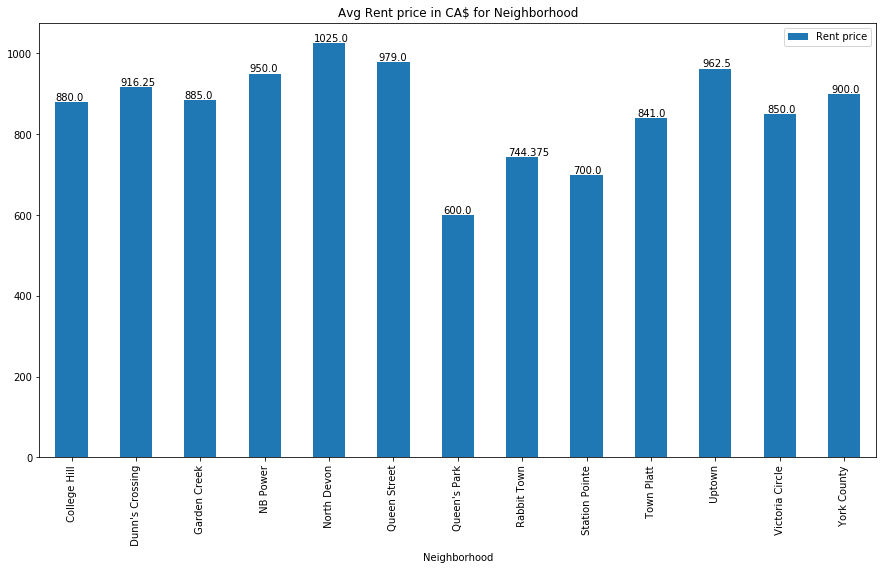

In [134]:
fig = plt.figure(figsize=(15,8))
ax0 = fig.add_subplot(1,1,1)


#Subplot 1: rent prices per neighborhood
rent_to_neig = grouped_df.plot.bar(x = 'Neighborhood', y = "Rent price", ax=ax0)
ax0.set_title("Avg Rent price in CA$ for Neighborhood")
for p in ax0.patches:
    ax0.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))


<p>Now, we show the average number of bedrooms and bathrooms in each Neighborhood:</p>

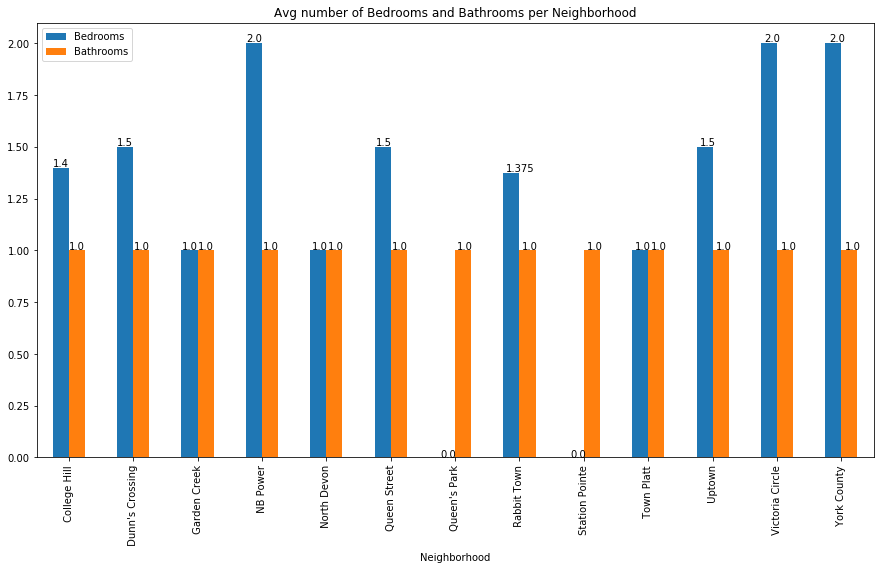

In [102]:
fig1 = plt.figure(figsize=(15,8))
ax1 = fig1.add_subplot(1,1,1)


#rent prices per neighborhood
bed_n_bath = grouped_df.plot.bar(x = 'Neighborhood', y = ["Bedrooms", "Bathrooms" ], ax=ax1)
ax1.set_title("Avg number of Bedrooms and Bathrooms per Neighborhood")
for p in ax1.patches:
    ax1.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))


<p>With the chart below, we can compare the types of amenities in each Neighborhood area, nearby the apartments:</p>

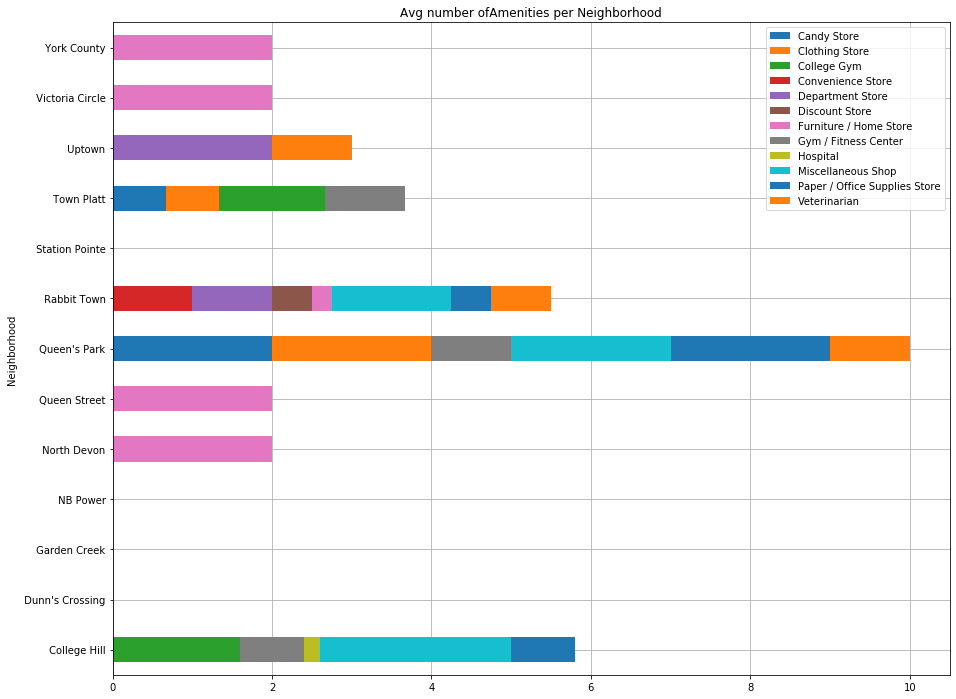

In [136]:
fig2 = plt.figure(figsize=(15,12))
ax2 = fig2.add_subplot(1,1,1)
#rent prices per neighborhood
amenities = grouped_df.plot.barh(x = 'Neighborhood', y = ["Candy Store", "Clothing Store", "College Gym", "Convenience Store", "Department Store", "Discount Store", "Furniture / Home Store", "Gym / Fitness Center", "Hospital","Miscellaneous Shop","Paper / Office Supplies Store", "Veterinarian"], ax=ax2, stacked= True, zorder = 2)
ax2.set_title("Avg number ofAmenities per Neighborhood")
ax2.grid(zorder=1 )



<p>Now, we prepare a grouped DF to analyse the influence in the number of the bedrooms and the rent prices </p>

In [137]:
grouped_df_bed = apartment_df.groupby(["Bedrooms"]).mean().reset_index()
grouped_df_bed

,Bedrooms,Unnamed: 0,Rent price,Bathrooms,Unnamed: 7,Candy Store,Clothing Store,College Gym,College Rec Center,Convenience Store,Department Store,Discount Store,Furniture / Home Store,General Travel,Gym / Fitness Center,Hospital,Miscellaneous Shop,None,Nudist Beach,Paper / Office Supplies Store,Smoke Shop,Tourist Information Center,Veterinarian
0,0,3.000000,592.571429,1.0,0.142857,0.571429,1.142857,0.000000,0.000000,0.857143,0.285714,0.285714,0.571429,1.142857,0.571429,0.000000,1.428571,0.000000,0.571429,1.142857,0.285714,0.571429,0.714286
1,1,20.583333,907.416667,1.0,0.250000,0.000000,0.000000,0.666667,0.250000,0.000000,0.333333,0.166667,0.333333,0.000000,0.333333,0.000000,0.666667,0.166667,0.083333,0.166667,0.166667,0.166667,0.166667
2,2,19.533333,882.266667,1.0,0.133333,0.000000,0.000000,0.266667,0.133333,0.400000,0.400000,0.000000,0.533333,0.133333,0.133333,0.066667,0.800000,0.133333,0.000000,0.266667,0.400000,0.266667,0.266667


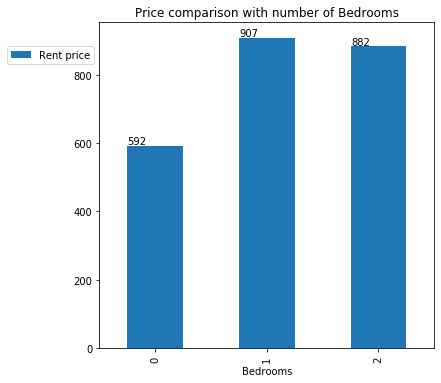

In [138]:
fig3 = plt.figure(figsize=(6,6))
ax3 = fig3.add_subplot(1,1,1)

#Number of bedrooms in relation to rent prices
bed_to_price = grouped_df_bed.plot.bar(x = "Bedrooms" , y = "Rent price", ax=ax3)
ax3.set_title("Price comparison with number of Bedrooms")
ax3.legend(loc='center right', bbox_to_anchor=(0.0, 0.9))
for p in ax3.patches:
    ax3.annotate(str(int(p.get_height())), (p.get_x() * 1.005, p.get_height() * 1.005))



<h3>With this information, we can make some conclusions about our data.</h3>